In [1]:
# Importing necessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(color_codes = True)  # --> for getting nice backgroud to the graphs
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the Netflix userbase dataset

Data = pd.read_csv("/Users/sange/Downloads/Netflix Userbase.csv")

In [ ]:
# Exploratory Data Analysis (EDA)

Data.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [4]:
# Basic Statistics Summary
Data.describe()

,User ID,Monthly Revenue,Age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


In [5]:
# Checking Null Values 
Data.isnull().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

In [6]:
# checking Duplicate Values 
Data.duplicated().sum()

0

In [7]:
# Checking Data type of every column
Data.dtypes

User ID               int64
Subscription Type    object
Monthly Revenue       int64
Join Date            object
Last Payment Date    object
Country              object
Age                   int64
Gender               object
Device               object
Plan Duration        object
dtype: object

In [8]:
# Converting datatype of join date and Last Payment Date from object to Date type
Data['Join Date'] = pd.to_datetime(Data['Join Date'])
Data['Last Payment Date'] = pd.to_datetime(Data['Last Payment Date'])

In [9]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   User ID            2500 non-null   int64         
 1   Subscription Type  2500 non-null   object        
 2   Monthly Revenue    2500 non-null   int64         
 3   Join Date          2500 non-null   datetime64[ns]
 4   Last Payment Date  2500 non-null   datetime64[ns]
 5   Country            2500 non-null   object        
 6   Age                2500 non-null   int64         
 7   Gender             2500 non-null   object        
 8   Device             2500 non-null   object        
 9   Plan Duration      2500 non-null   object        
dtypes: datetime64[ns](2), int64(3), object(5)
memory usage: 195.4+ KB


In [10]:
# Checking Number of subscriptions of each type
Data['Subscription Type'].value_counts()

Subscription Type
Basic       999
Standard    768
Premium     733
Name: count, dtype: int64

In [11]:
# Churn Rate Analysis
# Assuming the current date is '2023-07-11'
current_date = pd.to_datetime('2023-07-04')

# Calculate active status
Data['active_status'] = (current_date - Data['Last Payment Date']).dt.days <= 30
Data['active_status'] = Data['active_status'].map({True: 'Yes', False: 'No'})

In [12]:
Data.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,active_status
0,1,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,1 Month,Yes
1,2,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,1 Month,Yes
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,Yes
3,4,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,1 Month,Yes
4,5,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,1 Month,Yes


# 1. Bar plot - Gender distribution Analysis


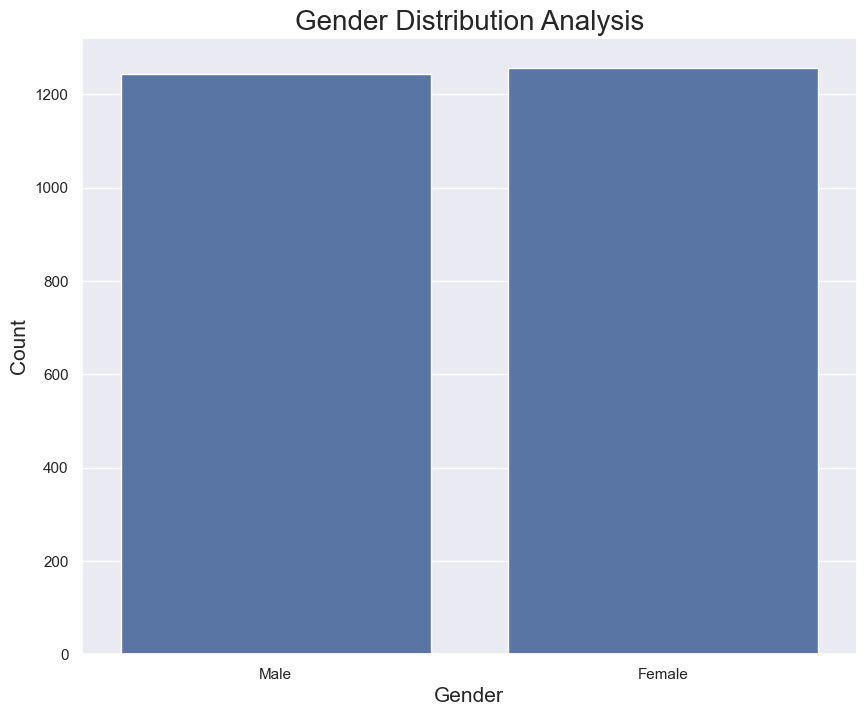

In [30]:
# Data visualization
# 1. Bar plot - Gender distribution Analysis

plt.figure(figsize = (10,8))
sns.countplot(x='Gender', data = Data)
plt.title('Gender Distribution Analysis',fontsize = 20)
plt.xlabel('Gender',fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.show()

# 2. Pie Chart - Subscription Plan Distribution Analysis

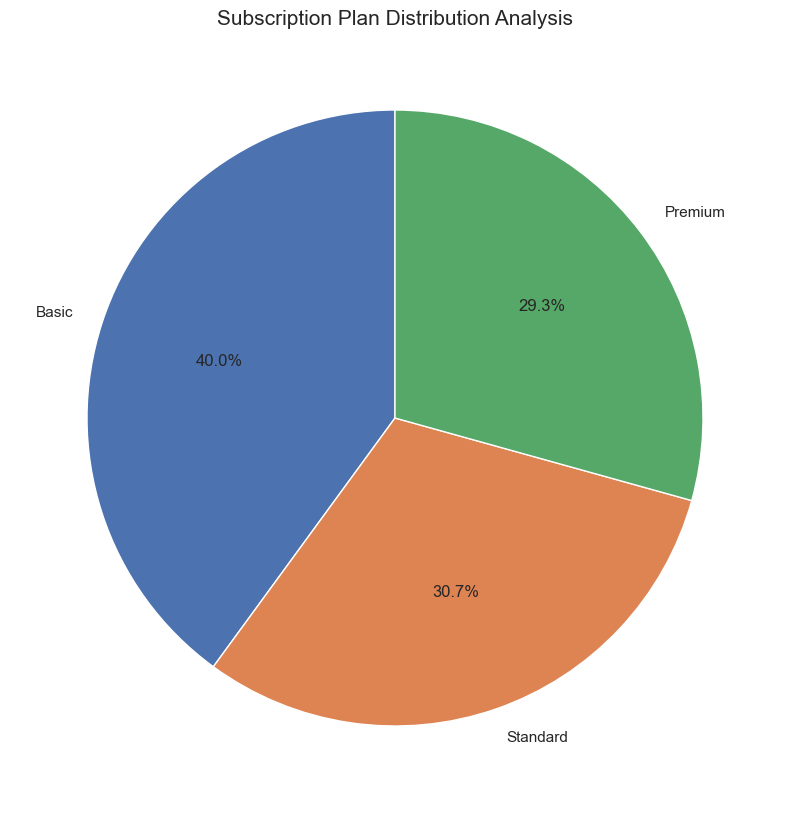

In [35]:
plt.figure(figsize = (10,10))
subscription_counts = Data['Subscription Type'].value_counts()
plt.pie(subscription_counts, labels=subscription_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Subscription Plan Distribution Analysis', fontsize = 15)
plt.show()


# 3. Bar plot - Distribution of Active and Inactive Users Across Subscription Plans

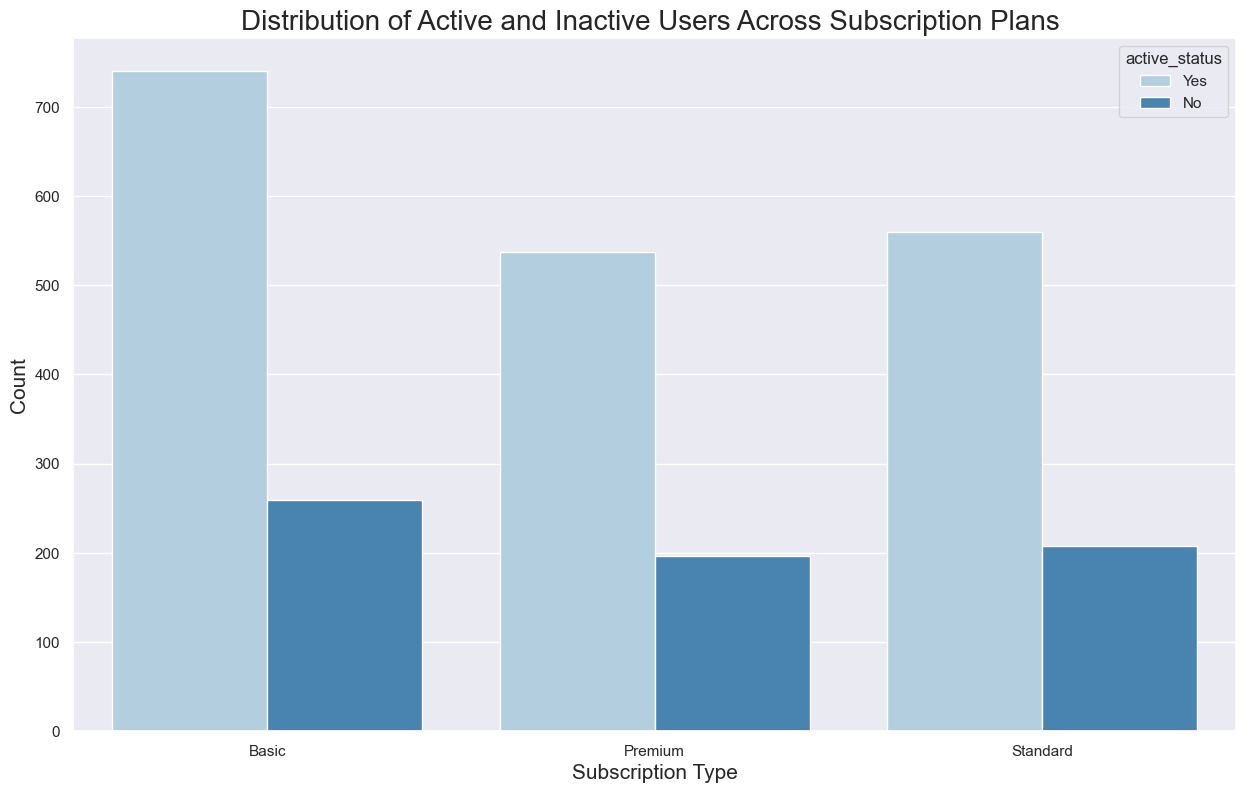

In [36]:
plt.figure(figsize = (15,9))
sns.countplot(x='Subscription Type', data = Data , hue = 'active_status',palette = 'Blues', alpha=1)
plt.title('Distribution of Active and Inactive Users Across Subscription Plans ',fontsize = 20)
plt.xlabel('Subscription Type',fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.show()

# 4. Analysis of Average Monthly Revenue by Subscription Plan

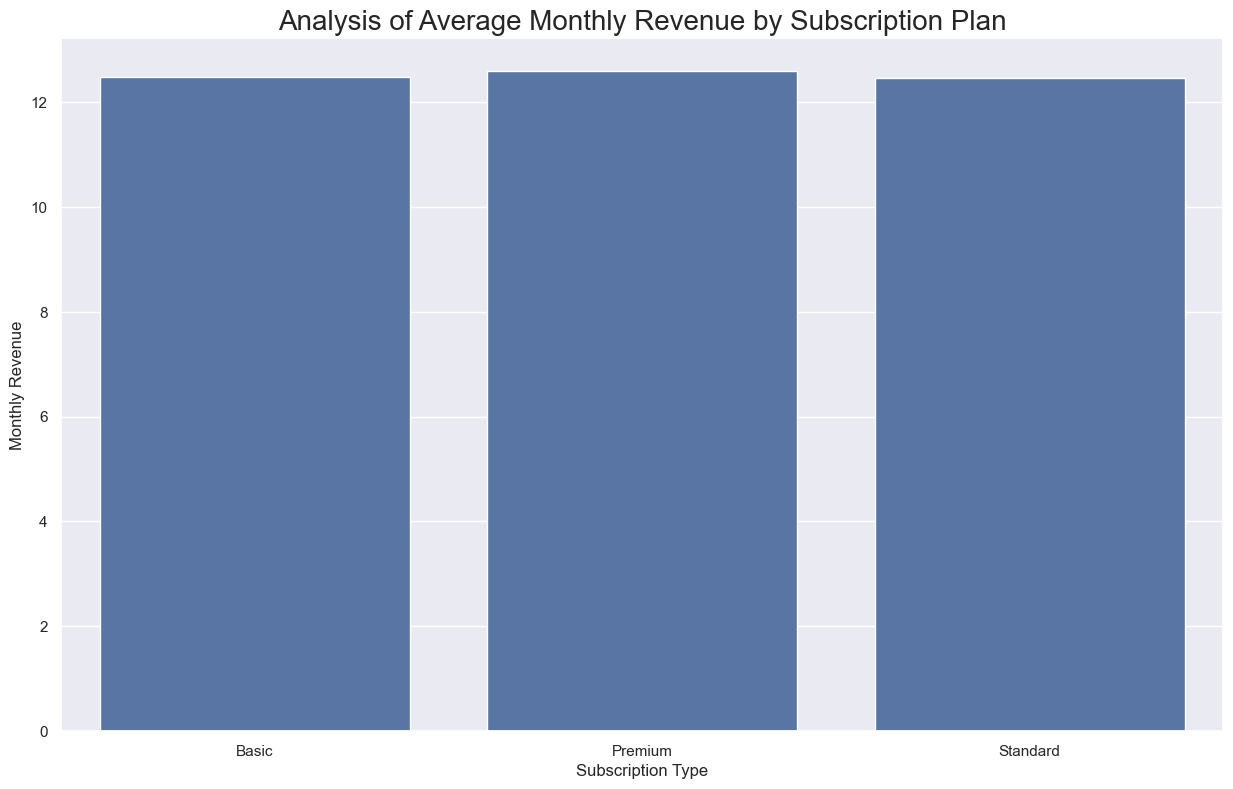

In [37]:
plt.figure(figsize=(15, 9))

sns.barplot(
    x='Subscription Type',
    y='Monthly Revenue',
    data=Data.groupby('Subscription Type')['Monthly Revenue']
             .mean()
             .reset_index()
)

plt.title('Analysis of Average Monthly Revenue by Subscription Plan', fontsize=20)
plt.show()


In [18]:
Data.groupby('Subscription Type')['Monthly Revenue'].mean()

Subscription Type
Basic       12.481481
Premium     12.590723
Standard    12.464844
Name: Monthly Revenue, dtype: float64

# 5. Analysis of Churn Rate by Subscription Plan

In [19]:
a = Data[Data['active_status']=='No'].groupby('Subscription Type').count()
a

,User ID,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,active_status
Subscription Type,,,,,,,,,,
Basic,259,259,259,259,259,259,259,259,259,259
Premium,196,196,196,196,196,196,196,196,196,196
Standard,208,208,208,208,208,208,208,208,208,208


In [20]:
Data['active_status'].value_counts()

active_status
Yes    1837
No      663
Name: count, dtype: int64

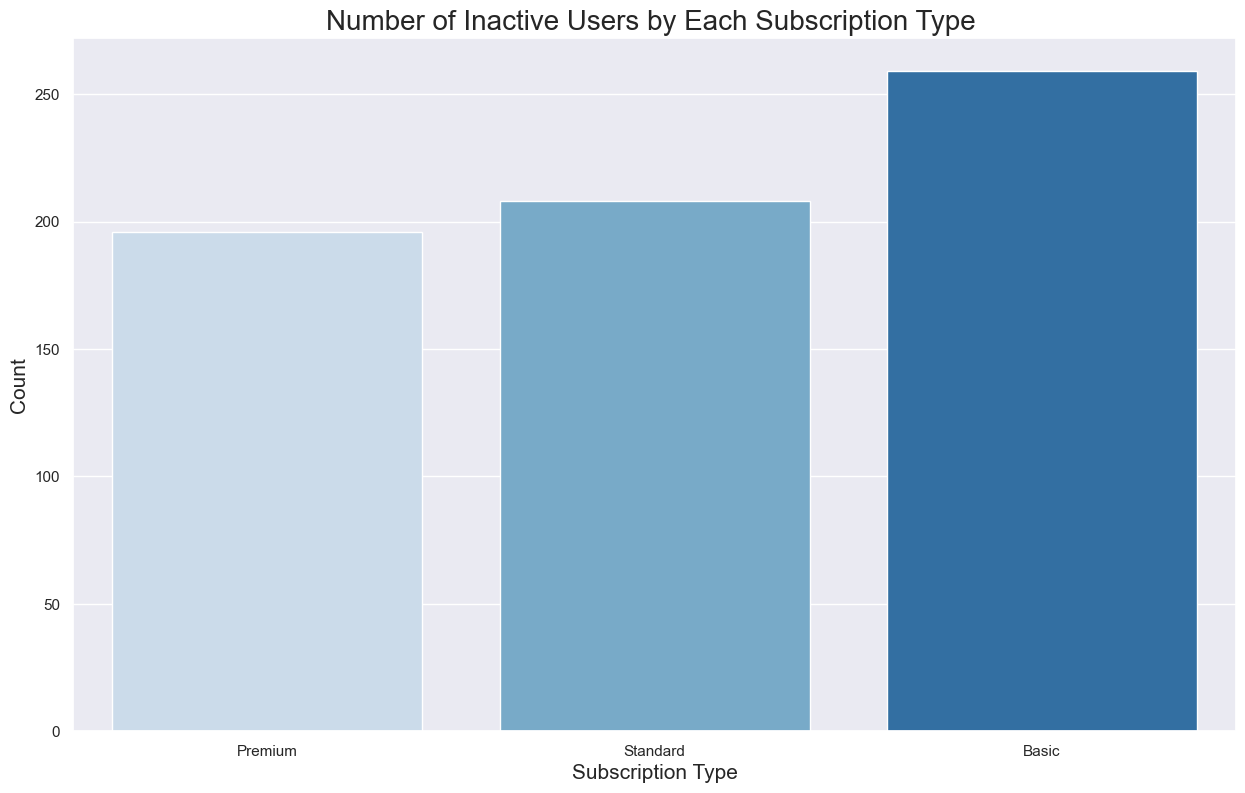

In [21]:
plt.figure(figsize = (15,9))
sns.countplot(x='Subscription Type', data = Data[Data['active_status']=='No'] ,palette = 'Blues', alpha=1)
plt.title('Number of Inactive Users by Each Subscription Type ',fontsize = 20)
plt.xlabel('Subscription Type',fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.show()

In [22]:
import random

def get_random_color():
    color = '#%06x' % random.randint(0, 0xFFFFFF)
    return color

colors = []
for i in range(10):
    color = get_random_color()
    colors.append(color)

# 6. Analysis of User Device Preferences

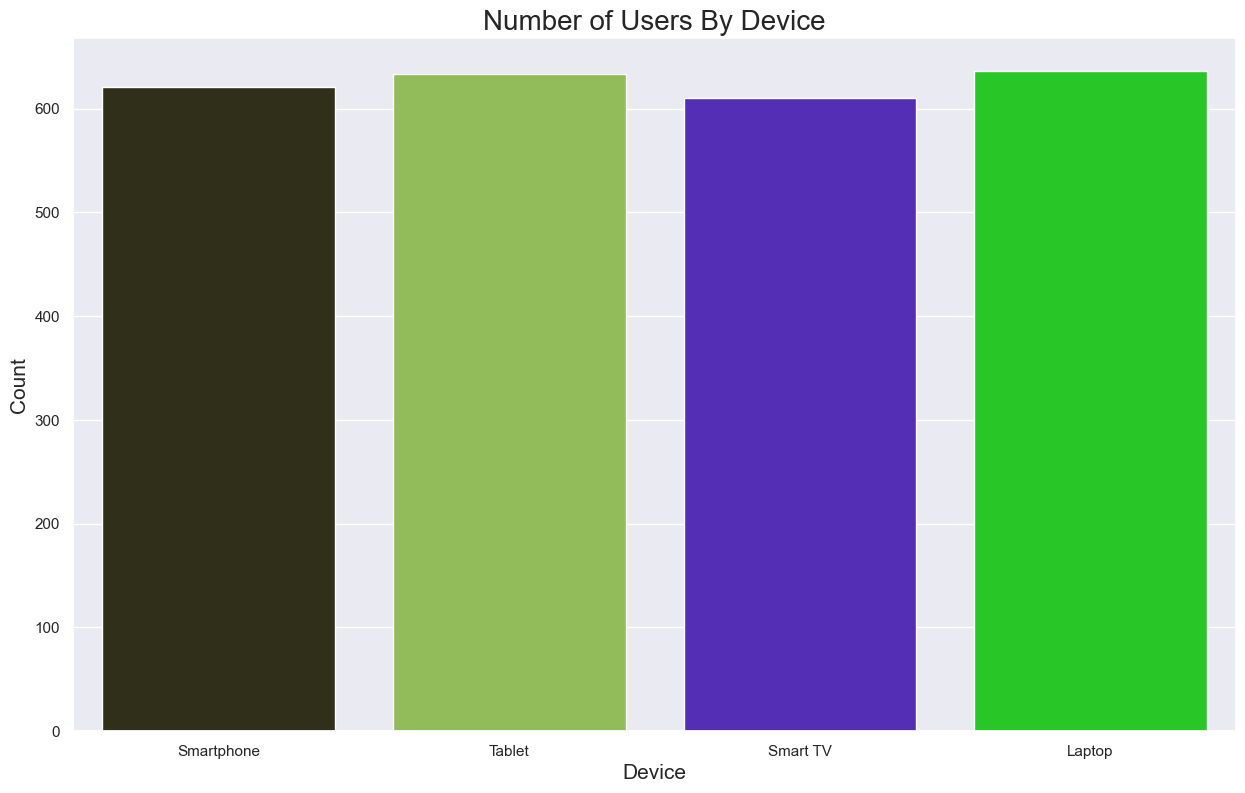

In [23]:
plt.figure(figsize = (15,9))
sns.countplot(x='Device', data = Data, palette = colors, alpha=1)
plt.title('Number of Users By Device',fontsize = 20)
plt.xlabel('Device',fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.show()

# 7.Age Group-wise User Distribution

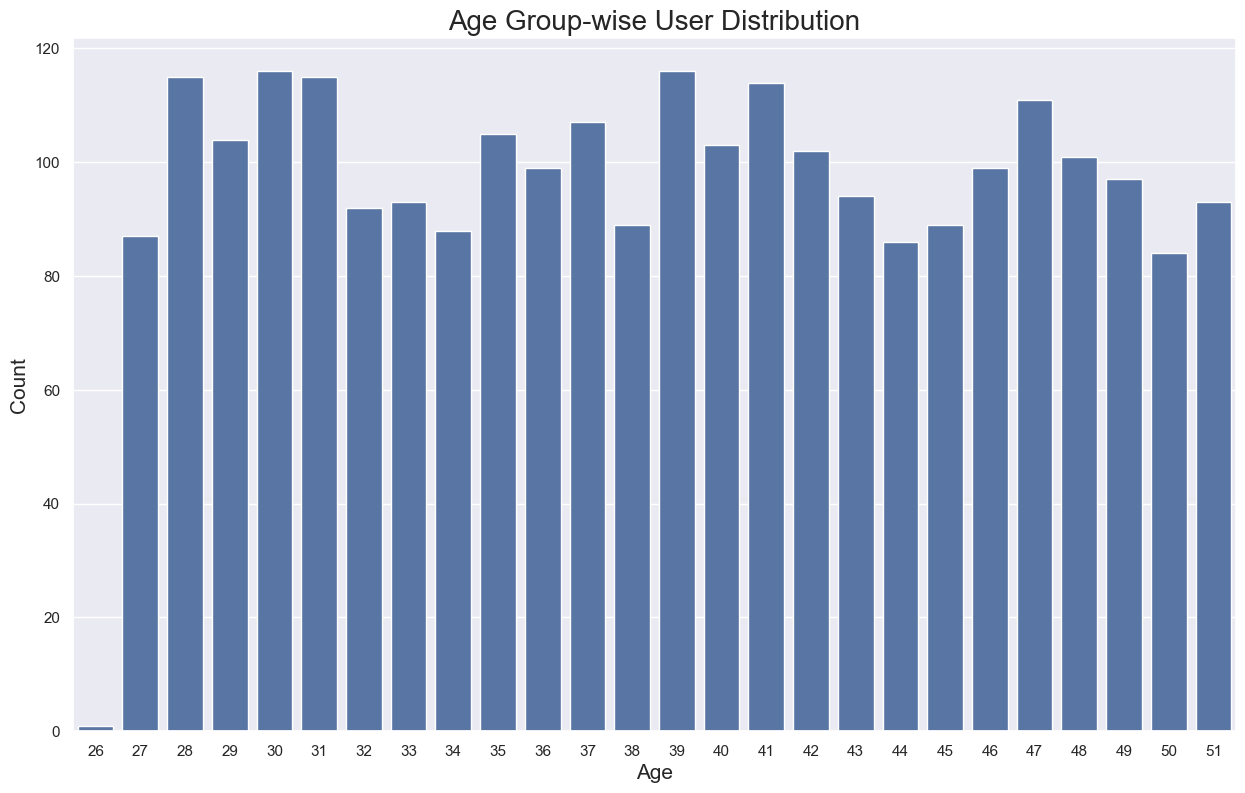

In [38]:
plt.figure(figsize = (15,9))
sns.countplot(x='Age', data = Data, alpha=1)
plt.title('Age Group-wise User Distribution',fontsize = 20)
plt.xlabel('Age',fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.show()


# 8. Heatmap -  Correlation Analysis of Key Variables

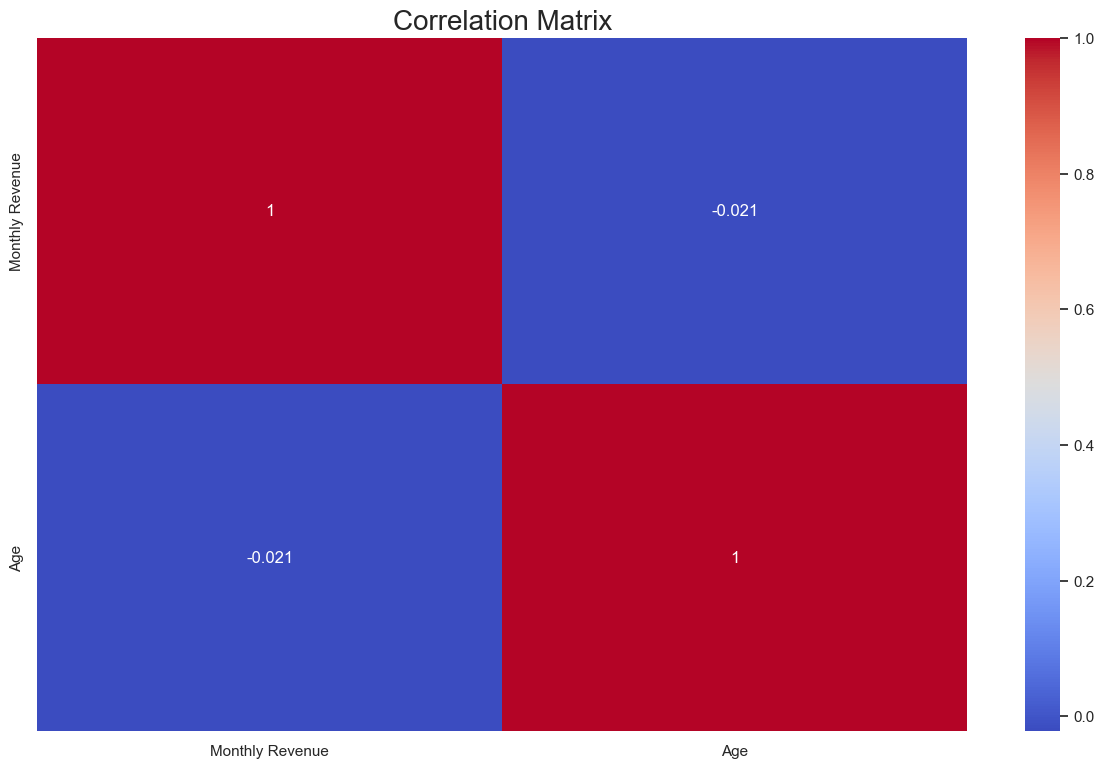

In [25]:
plt.figure(figsize = (15,9))
corr = Data[['Monthly Revenue','Age']].corr()
sns.heatmap(corr,annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix' , fontsize = 20)
plt.show()

# 9. Bar plot - Country-wise User Distribution

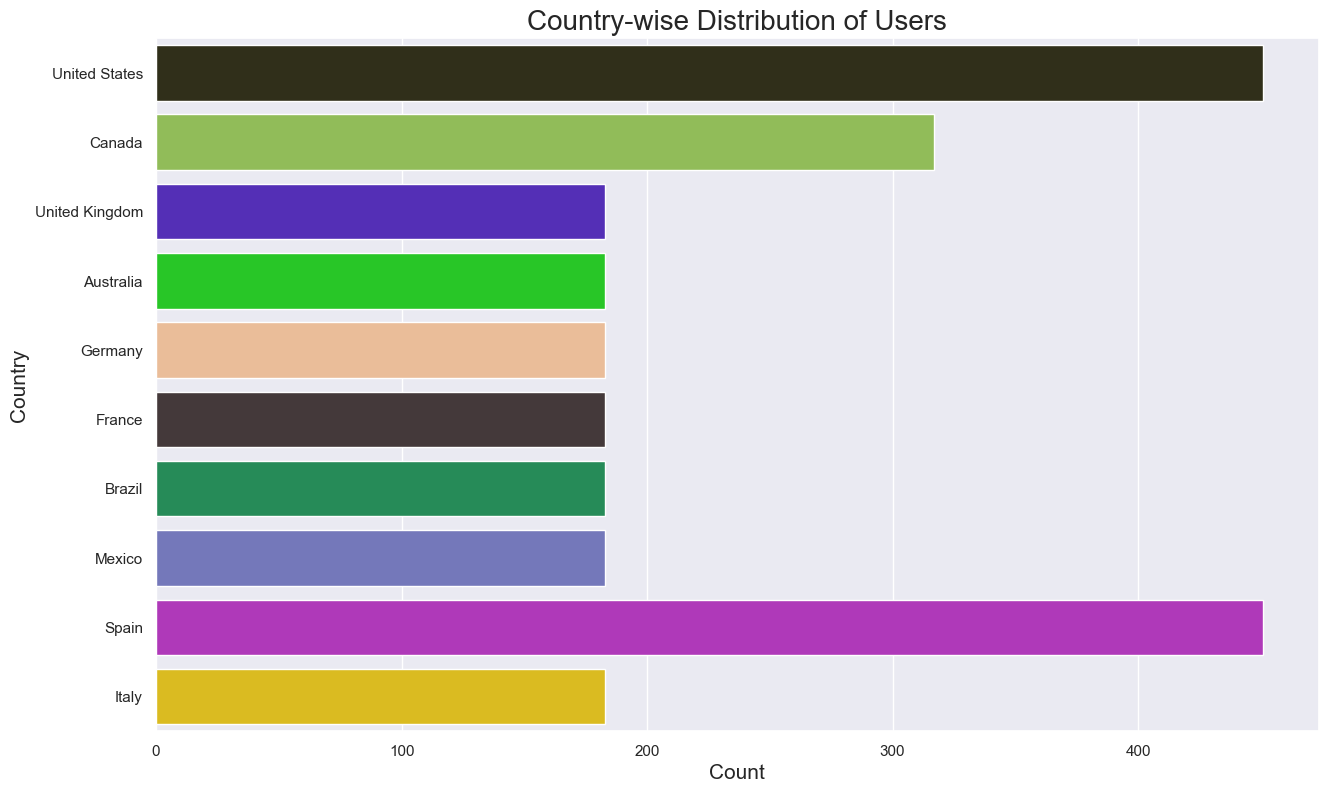

In [39]:
plt.figure(figsize = (15,9))
sns.countplot(y='Country', data = Data ,palette = colors ,alpha=1 )
plt.title('Country-wise Distribution of Users',fontsize = 20)
plt.xlabel('Count',fontsize = 15)
plt.ylabel('Country',fontsize = 15)
plt.show()

# 10. Violin plot - Distribution of User Age Across Subscription Plans

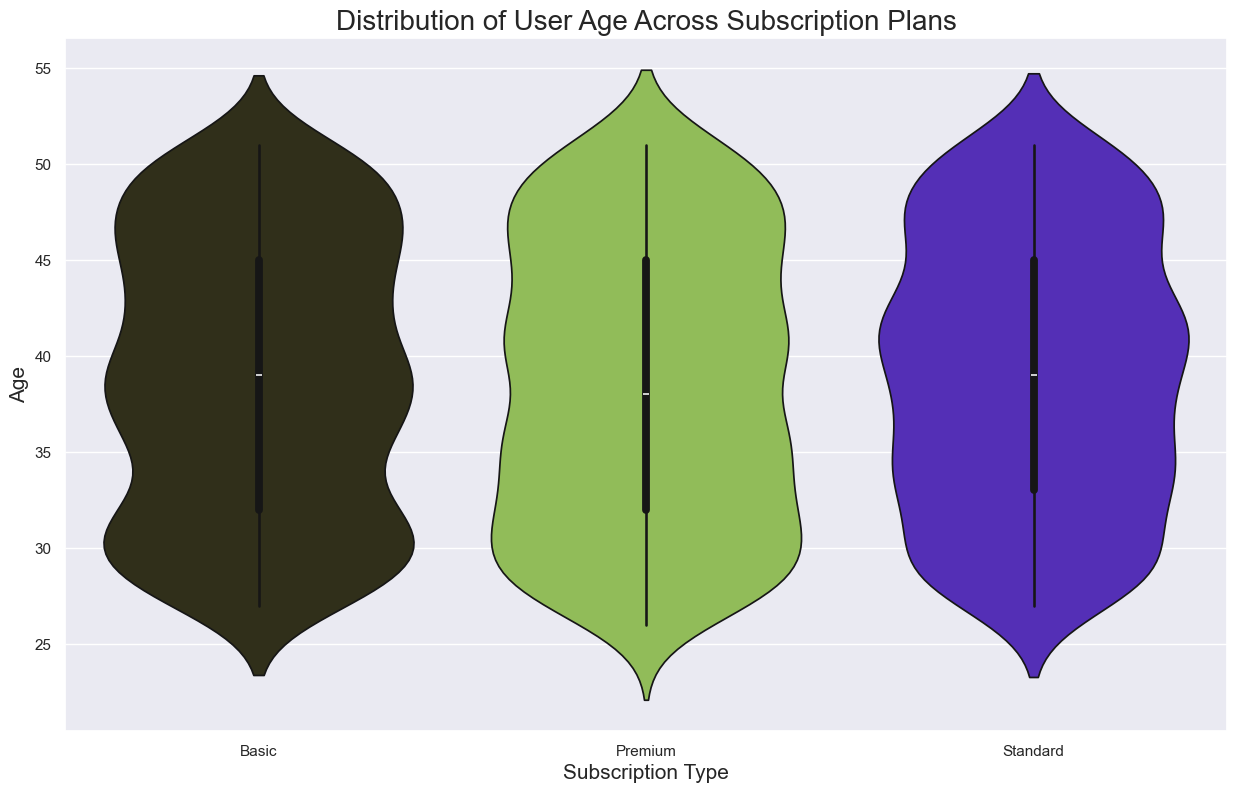

In [40]:
# Violin plot - Age distribution by subscription type
plt.figure(figsize = (15,9))
sns.violinplot(x='Subscription Type', y='Age', data=Data, palette=colors, alpha=1)
plt.title('Distribution of User Age Across Subscription Plans', fontsize = 20)
plt.xlabel('Subscription Type', fontsize = 15)
plt.ylabel('Age', fontsize = 15)
plt.show()

# ANALYSIS OVERVIEW : 

1)Gender Distribution
The gender distribution of Netflix users is nearly balanced, with a slight predominance of female users. Females constitute 50.3% of the user base, while males account for 49.7%, indicating minimal gender disparity among subscribers.
2)Subscription Type Distribution
The Basic subscription plan is the most widely adopted, representing 40.2% of total users. The Standard plan follows with 30.7%, while the Premium plan accounts for 29.1%. This suggests a preference for cost-effective subscription options among users.
3)Inactive User Distribution
Inactive users are more prevalent among Basic plan subscribers compared to Standard and Premium users. This trend may be attributed to the lower cost of the Basic plan, making it easier for users to discontinue the service when usage decreases.
4)Monthly Revenue Distribution
The Premium subscription plan generates the highest average monthly revenue, followed by the Standard and Basic plans. This outcome aligns with the enhanced features, content access, and higher pricing associated with Premium subscriptions.
5)Device Usage Distribution
Laptops are the most commonly used devices for accessing Netflix, followed by tablets, smartphones, and smart TVs. This pattern indicates user preference for devices that offer both portability and a comparatively larger viewing screen.
6)Age Distribution
A significant proportion of Netflix users fall within the 27–45 age group. This demographic is likely to have higher disposable income and a stronger inclination toward digital entertainment platforms.

